
<img src = "https://raw.githubusercontent.com/DevoLearn/devolearn/master/images/banner_1.jpg">

## Hello and welcome to devolearn !


In [ ]:
pip install git+https://github.com/DevoLearn/devolearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/DevoLearn/devolearn to /tmp/pip-req-build-f2zo3j6e
  Running command git clone -q https://github.com/DevoLearn/devolearn /tmp/pip-req-build-f2zo3j6e
     |████████████████████████████████| 829 kB 4.3 MB/s 
     |████████████████████████████████| 562 kB 36.1 MB/s 
     |████████████████████████████████| 302 kB 22.6 MB/s 
     |████████████████████████████████| 1.1 MB 47.2 MB/s 
     |████████████████████████████████| 1.6 MB 56.6 MB/s 
     |████████████████████████████████| 14.8 MB 41.4 MB/s 
     |████████████████████████████████| 50.4 MB 82 kB/s 
     |████████████████████████████████| 9.5 MB 47.5 MB/s 
     |████████████████████████████████| 58 kB 6.9 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 280 kB 61.0 MB/s 
     |████████████████████████████████| 227 kB 62.7 MB/s 
     |██████████████████████████

In [ ]:
!git clone https://github.com/DevoLearn/devolearn.git
## for sample data

Cloning into 'devolearn'...
remote: Enumerating objects: 856, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 856 (delta 106), reused 153 (delta 81), pack-reused 661
Receiving objects: 100% (856/856), 418.87 MiB | 22.62 MiB/s, done.
Resolving deltas: 100% (482/482), done.
Checking out files: 100% (47/47), done.


In [ ]:
from devolearn import lineage_population_model
from devolearn import Generator, embryo_generator_model
from devolearn import cell_membrane_segmentor

import matplotlib.pyplot as plt
import os 
import cv2

## Run tests (optional)

In [ ]:
import devolearn
os.path.dirname(devolearn.__file__) + "/" + "tests" + "/" + "test.py"
!python /usr/local/lib/python3.6/dist-packages/devolearn/tests/test.py

python3: can't open file '/usr/local/lib/python3.6/dist-packages/devolearn/tests/test.py': [Errno 2] No such file or directory


## Importing a Pre-Trained model

The first time you'll run the cell below, devolearn will automatically download the latest model weights from GitHub

In [ ]:
from torch._C import device
model = lineage_population_model(device = "cpu")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## Estimating the lineage-wise population of cells within the C. elegans embryo from a photo  

In [ ]:
pred = model.predict(image_path = "devolearn/devolearn/tests/sample_data/images/embryo_sample.png")
print(pred)

{'A': 21, 'E': 2, 'M': 5, 'P': 0, 'C': 4, 'D': 1, 'Z': 0}


## Estimating the same populations from a video file



One can directly save the frame-wise video predictions into a CSV file with `save_csv = True`

In [ ]:
if os.path.isdir("sample_preds") is not True:
    os.mkdir("sample_preds")

results = model.predict_from_video(video_path = "devolearn/devolearn/tests/sample_data/videos/embryo_timelapse.mov", 
                                   save_csv = True, 
                                   csv_name = "sample_preds/video_preds.csv", 
                                   ignore_first_n_frames= 10, 
                                   ignore_last_n_frames= 10 
                                   )


Predicting from video file:  ::   0%|          | 1/389 [00:00<00:55,  7.04it/s]

skipped possible corrupt frame number :  389


Predicting from video file:  :: 100%|██████████| 389/389 [00:46<00:00,  8.41it/s]


In [ ]:
results.tail(5)

,A,E,M,P,C,D,Z
373,228,10,38,1,24,7,2
374,188,8,30,1,20,6,1
375,27,11,43,1,26,8,1
376,232,10,38,1,23,7,2
377,207,8,33,0,21,6,1


##  Generating a population plot directly from a video file 

Predicting from video file:  ::   0%|          | 1/389 [00:00<00:45,  8.45it/s]

skipped possible corrupt frame number :  389


Predicting from video file:  :: 100%|██████████| 389/389 [00:53<00:00,  7.25it/s]


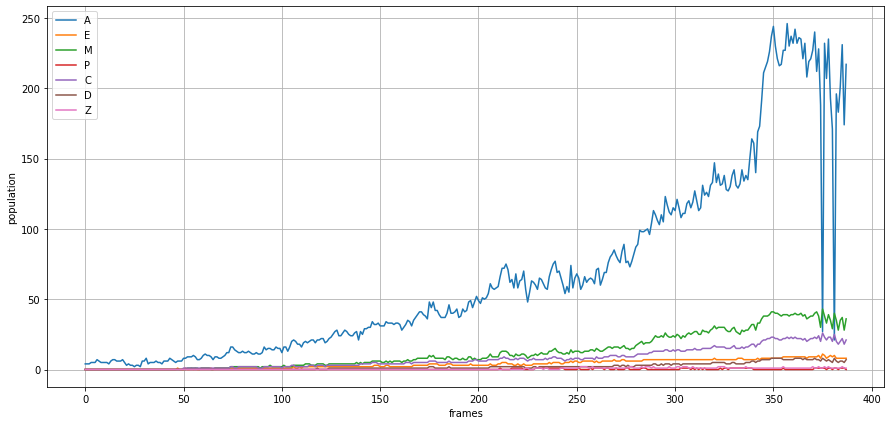

In [ ]:
plt.rcParams['figure.figsize'] = 15, 7
                                    
plot = model.create_population_plot_from_video(video_path = "devolearn/devolearn/tests/sample_data/videos/embryo_timelapse.mov", 
                                               save_plot= True, 
                                               plot_name= "sample_preds/plot.jpg", 
                                               ignore_last_n_frames= 0 
                                               )
plot.grid()
plot.show()

## Using the pre-trained GAN to synthetic images of embryos 

In [ ]:
generator = embryo_generator_model()

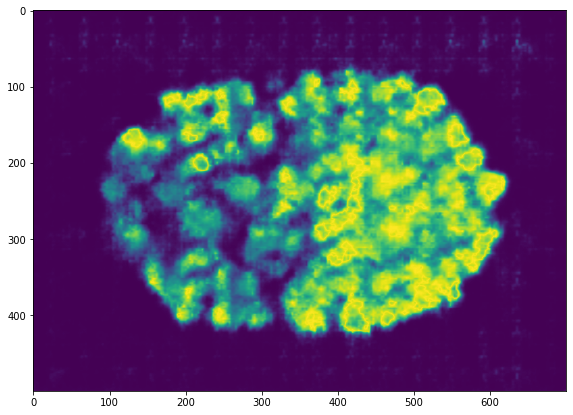

In [ ]:
gen_image = generator.generate()  ## returns a 2d numpy array 
plt.imshow(gen_image)
plt.show()

## Bulk generation using the GAN 

All the generated images get saved into the folder `foldername`

generating images :: 100%|██████████| 20/20 [00:01<00:00, 12.73it/s]


Saved  20  images in generated_images


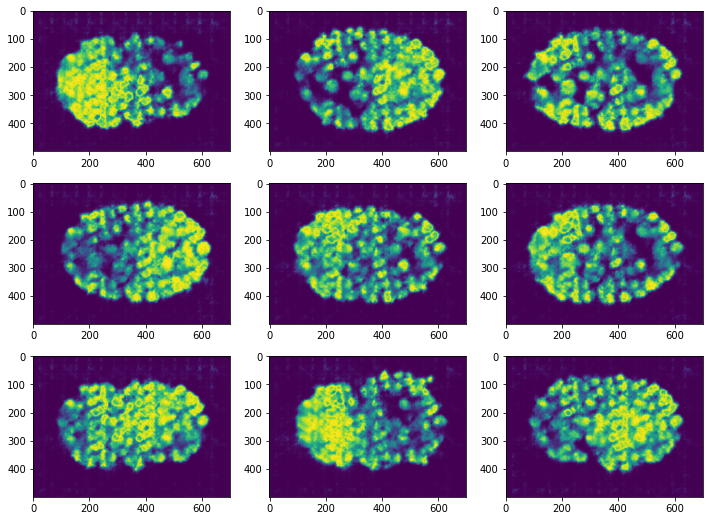

In [ ]:
generator.generate_n_images(n = 20, 
                            foldername= "generated_images", 
                            image_size= (700,500)  ## (width,height)
                            )

fig, ax = plt.subplots(3,3, figsize = (12,9))

image_paths = os.listdir("generated_images")
for i in range(9):
    image = cv2.imread("generated_images/" + image_paths[i], 0)
    ax.flat[i].imshow(image)


## Segmenting the C. elegans embryo 

In [ ]:
from devolearn import cell_membrane_segmentor
segmentor = cell_membrane_segmentor()


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

### Segmenting an image 

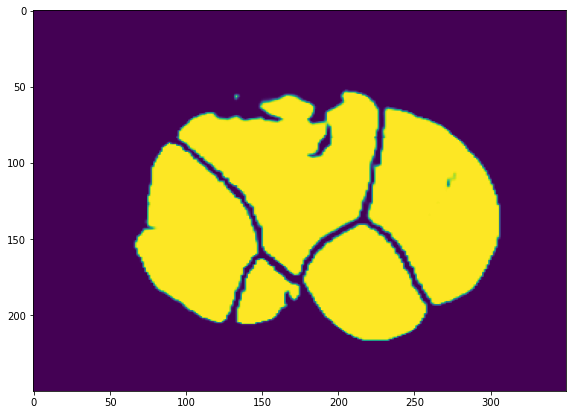

In [ ]:
seg_pred = segmentor.predict(image_path = "devolearn/devolearn/tests/sample_data/images/seg_sample.jpg", centroid_mode =False )
plt.imshow(seg_pred)
plt.show()

### Segmenting and extracting the centroids 

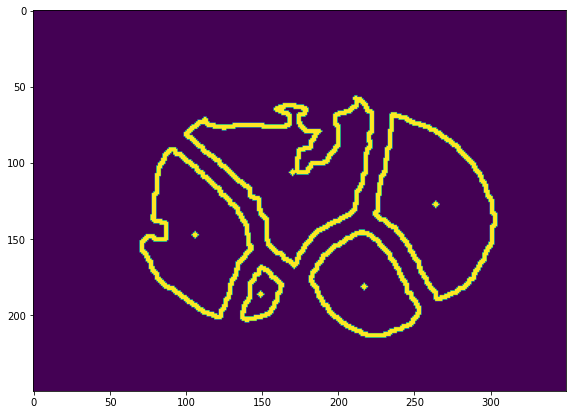

In [ ]:
seg_pred, centroids = segmentor.predict(image_path = "devolearn/devolearn/tests/sample_data/images/seg_sample.jpg", centroid_mode = True)
plt.imshow(seg_pred)
plt.show()

# Frame by frame segmentation from video files

All the segmented frames get saved into the folder `save_folder`

In [ ]:
filenames = segmentor.predict_from_video(video_path = "devolearn/devolearn/tests/sample_data/videos/seg_sample.mov", 
                                         centroid_mode = False, 
                                         save_folder = "segmented_images"
                                         )

saving predictions: 100%|██████████| 421/421 [01:34<00:00,  4.45it/s]


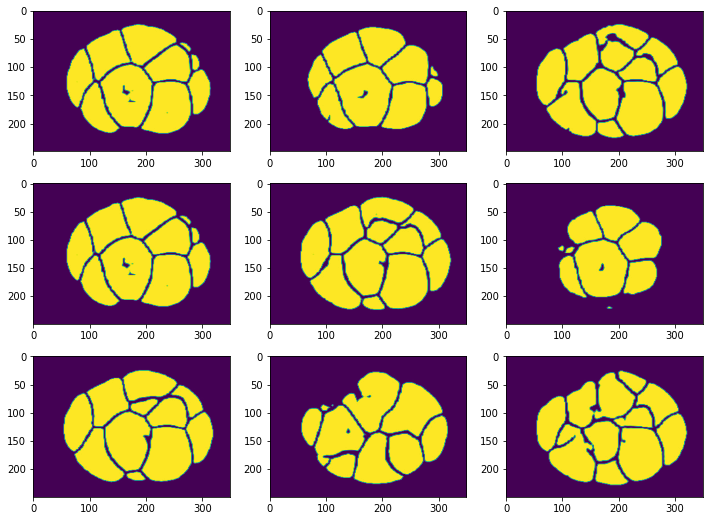

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (12,9))

segmented_image_paths = os.listdir("segmented_images")
for i in range(9):
    image = cv2.imread("segmented_images/" + segmented_image_paths[i], 0)
    ax.flat[i].imshow(image)

### Segmenting from a video and saving the centroids into a CSV file 



In [ ]:
df = segmentor.predict_from_video(video_path = "devolearn/devolearn/tests/sample_data/videos/seg_sample.mov", 
                                  centroid_mode = True, 
                                  save_folder = "centroid")
df.to_csv("centroids.csv")

saving predictions: 100%|██████████| 421/421 [01:35<00:00,  4.41it/s]


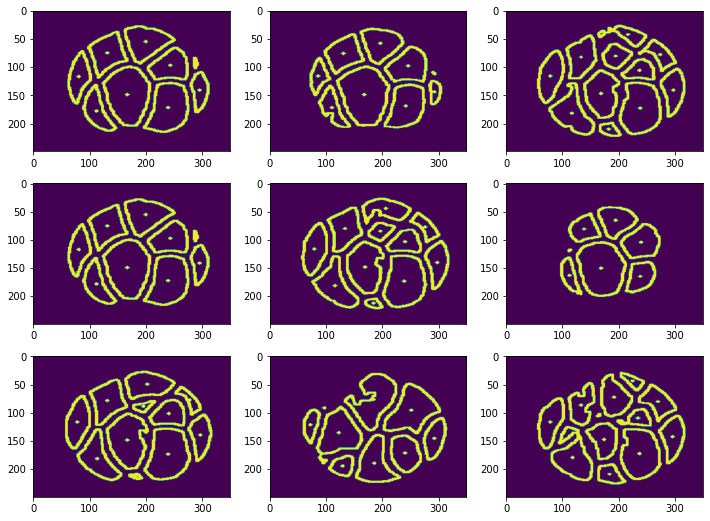

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (12,9))

segmented_image_paths = os.listdir("centroid")
for i in range(9):
    image = cv2.imread("centroid/" + segmented_image_paths[i], 0)
    ax.flat[i].imshow(image)